In [1]:
import shapely
import pystac_client

In [2]:
import sys

sys.path.append("../..")

In [3]:
from cdseutils.utils import BBox

In [4]:
endpoint_url = "https://catalogue.dataspace.copernicus.eu/stac"

In [5]:
# collection = "COP-DEM"
collection = "CCM"

In [6]:
polygon_wkt = (
    "POLYGON ((111.623686 -30.422697, 112.870434 -26.377362, 113.759005"
    " -25.655883, 114.765229 -25.708236, 115.744513 -26.528056, 116.666913"
    " -26.189345, 117.624098 -26.513583, 118.168346 -27.956584, 116.881996"
    " -32.007367, 115.588516 -32.562306, 114.147425 -31.54362, 113.096861"
    " -31.948575, 112.15162 -31.591408, 111.623686 -30.422697))"
)

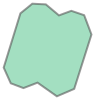

In [7]:
polygon = shapely.from_wkt(polygon_wkt)
polygon

In [8]:
bbox = BBox(*polygon.bounds)
bbox

BBox(left=111.623686, bottom=-32.562306, right=118.168346, top=-25.655883)

In [9]:
client = pystac_client.Client.open(endpoint_url)
assert client.conforms_to("ITEM_SEARCH")
# assert client.conforms_to("FILTER")
client.add_conforms_to("FILTER")  # silence warnings
# assert client.conforms_to("SORT")

In [10]:
client.get_conforms_to()

['https://api.stacspec.org/v1.0.0/core',
 'https://api.stacspec.org/v1.0.0/collections',
 'https://api.stacspec.org/v1.0.0/ogcapi-features',
 'https://api.stacspec.org/v1.0.0/item-search',
 'https://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core',
 'https://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson',
 'http://www.opengis.net/spec/cql2/1.0/conf/cql2-json',
 'https://api.stacspec.org/v1.0.*/item-search#filter']

In [11]:
collections = set(client.get_all_collections())
collections

{<CollectionClient id=CCM>,
 <CollectionClient id=CLMS>,
 <CollectionClient id=COP-DEM>,
 <CollectionClient id=ENVISAT>,
 <CollectionClient id=GLOBAL-MOSAICS>,
 <CollectionClient id=LANDSAT-5>,
 <CollectionClient id=LANDSAT-7>,
 <CollectionClient id=LANDSAT-8-ESA>,
 <CollectionClient id=LANDSAT-8>,
 <CollectionClient id=LANDSAT-9>,
 <CollectionClient id=S2GLC>,
 <CollectionClient id=SENTINEL-1-RTC>,
 <CollectionClient id=SENTINEL-1>,
 <CollectionClient id=SENTINEL-2>,
 <CollectionClient id=SENTINEL-3>,
 <CollectionClient id=SENTINEL-5P>,
 <CollectionClient id=SENTINEL-6>,
 <CollectionClient id=SMOS>,
 <CollectionClient id=SUOMI-NPP>,
 <CollectionClient id=TERRA>,
 <CollectionClient id=TERRAAQUA>}

In [12]:
assert collection in {item.id for item in collections}

In [13]:
filter = {  # noqa: A001
    "op": "=",
    "args": [
        {"property": "dataset"},
        "COP-DEM_GLO-90-DGED/2024_1",
    ],
}

In [14]:
# sortby = [
#     {"direction": "asc", "field": "properties.gridId"},
#     {"direction": "desc", "field": "properties.dataset"},
# ]

In [15]:
dged_search = client.search(
    collections=[collection],
    filter=filter,
    bbox=bbox,
    # sortby=sortby,
    # max_items=10,
)

In [16]:
items = list(dged_search.items())
print(f"{len(items)} items found")
items

43 items found


[<Item id=DEM1_SAR_DGE_90_20110815T220001_20121017T220048_ADS_000000_2957_4cb0c173.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110227T213349_20130327T213545_ADS_000000_6243_55227d70.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101228T214152_20121125T215257_ADS_000000_2295_4f3d7edf.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110227T213349_20121120T214521_ADS_000000_3612_f65048bf.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101223T213307_20121120T214521_ADS_000000_8135_15616a76.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110108T214152_20120904T214417_ADS_000000_3111_bd80ce54.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101223T213307_20121029T214521_ADS_000000_8099_d0dc99bb.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101229T212407_20121115T213653_ADS_000000_0943_ebda0e1e.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101229T212407_20121115T213653_ADS_000000_5357_8ba843e0.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101228T214152_20121114T215252_ADS_000000_9199_e205a157.DEM>,
 <Item id=DEM1_SAR_DGE_90_20101228T214152_20121114T215252_ADS_000000_9235_49602a67.DEM>,
 <Item id=DEM1_SAR_DG

In [17]:
item = items[0]

In [18]:
item

<Item id=DEM1_SAR_DGE_90_20110815T220001_20121017T220048_ADS_000000_2957_4cb0c173.DEM>

In [19]:
asset = item.assets["PRODUCT"]
asset

<Asset href=https://catalogue.dataspace.copernicus.eu/odata/v1/Products(f5567731-cfa6-471d-89fe-d004e8452486)/$value>

In [20]:
asset.href

'https://catalogue.dataspace.copernicus.eu/odata/v1/Products(f5567731-cfa6-471d-89fe-d004e8452486)/$value'

In [21]:
asset.extra_fields["alternate"]["s3"]

{'href': '/eodata/CCM/COP-DEM_GLO-90-DGED/SAR_DGE_90_A407/2011/08/15/DEM1_SAR_DGE_90_20110815T220001_20121017T220048_ADS_000000_2957_4cb0c173',
 'storage:platform': 'CLOUDFERRO',
 'storage:region': 'waw',
 'storage:requester_pays': False,
 'storage:tier': 'Online'}